# Connecting to the twitter API

In [33]:
import oauth2 as oauth
import json

In [34]:
with open('config.json') as file:
    tokens = json.loads(file.read())

# read the consumer keys and secret
consumer = oauth.Consumer(key = tokens['CONSUMER_KEY'] , secret = tokens['CONSUMER_SECRET'])

# read the tokens key and secret
token = oauth.Token( key = tokens['ACCESS_TOKEN'] , secret = tokens['ACCESS_SECRET'])

#create a client object
client = oauth.Client(consumer,token)

client

In [45]:
FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#twitter handle
screen_name = 'abbiyanaila'

url = FOLLOWERS_URL+'?screen_name='+screen_name

header , response  = client.request(url,method='GET')

In [46]:
print('status:', header['status'])

status: 200


In [47]:
print(response[:600])

b'{"users":[{"id":2577154123,"id_str":"2577154123","name":"Mike Bugembe","screen_name":"MikeBugembe","location":"London","description":"Data, Machine learning, AI","url":"https:\\/\\/t.co\\/BnHjPmntBA","entities":{"url":{"urls":[{"url":"https:\\/\\/t.co\\/BnHjPmntBA","expanded_url":"http:\\/\\/www.mikebugembe.com","display_url":"mikebugembe.com","indices":[0,23]}]},"description":{"urls":[]}},"protected":false,"followers_count":650,"friends_count":1450,"listed_count":33,"created_at":"Thu Jun 19 16:28:17 +0000 2014","favourites_count":114,"utc_offset":null,"time_zone":null,"geo_enabled":false,"verified":f'


# Working with twitter retweet data

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [50]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.git',
 'Untitled.ipynb',
 'retweets.txt',
 'README.md',
 'config.json']

In [56]:
edgelist_txt = 'retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

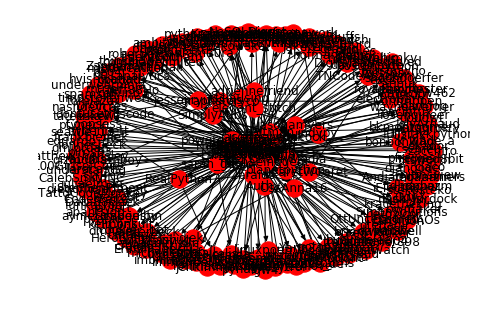

In [57]:
nx.draw(G, with_labels=True)

In [58]:
LAYOUTS = {
        'circular':nx.circular_layout,
        'fr':nx.fruchterman_reingold_layout,
        'random':nx.random_layout,
        'shell':nx.shell_layout,
        'spectral':nx.spectral_layout,
        'spring':nx.spectral_layout
}

In [63]:
def save_layout(G, layout_name):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >1.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge = [n for n in G.nodes () if n in ['PyTennessee']]
    pos = LAYOUTS[layout_name](G)
    
    print(nlarge)
    #nodes
    nx.draw_networkx_nodes(G, pos, nodelist=nlarge, node_size=1)
    
    #edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#cccccc')
    
    #labelsM
    labels = {}
    labels['PyTennessee'] = 'PyTennessee'
    nx.draw_networkx_labels(G, pos, labels, font_size=6)
    
    plt.axis('off')
    plt.figure(figsize=(100,90))

['PyTennessee']


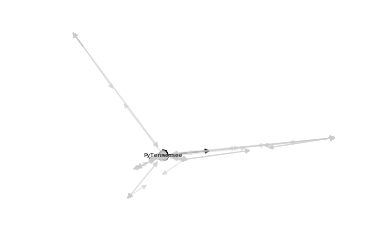

<Figure size 7200x6480 with 0 Axes>

In [64]:
#print the spring layout
save_layout(G, 'spring')

['PyTennessee']


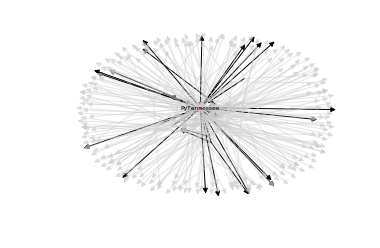

<Figure size 7200x6480 with 0 Axes>

In [66]:
#print the fruchterman layout
save_layout(G, 'fr')